## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則化來觀察訓練情形。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
wine = datasets.load_wine()
boston = datasets.load_boston()
breast_cancer = datasets.load_breast_cancer()

In [3]:
#wine做羅吉斯回歸
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

print(logreg.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

[[-5.88852656e-01  6.67300827e-01  1.00960693e+00 -5.80989219e-01
  -3.55178256e-02  3.62071144e-01  1.18894658e+00  3.78340624e-03
  -4.54784892e-01 -1.53560698e-01 -1.62107824e-01  9.11550191e-01
   1.77906683e-02]
 [ 9.31771389e-01 -1.08459849e+00 -7.53390627e-01  2.41931110e-01
   1.24181909e-02  3.53858216e-02  5.76719638e-01  5.39359650e-01
   6.06710292e-01 -1.86151560e+00  9.52831552e-01  7.69014213e-02
  -1.44579779e-02]
 [-3.44877619e-01  6.57378630e-01  3.90432260e-02  1.20175740e-01
   1.94696375e-02 -6.60620544e-01 -1.84324382e+00 -9.24618142e-02
  -6.79666411e-01  1.08773341e+00 -4.94768310e-01 -1.20152083e+00
   2.92068606e-04]]
Mean squared error: 0.06
Accuracy:  0.9444444444444444


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [14]:
MSE = []
alpha = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]
#wine 做LASSO正則化
for i in alpha:
    lasso = linear_model.Lasso(alpha=i)

    # 將訓練資料丟進去模型訓練
    lasso.fit(x_train, y_train)

    # 將測試資料丟進模型得到預測結果
    y_pred = lasso.predict(x_test)

    print(lasso.coef_)
    MSE.append(mean_squared_error(y_test,y_pred))
print('MSE: ',MSE)

[-0.          0.         -0.          0.02903446  0.00036735 -0.
 -0.29879073  0.         -0.          0.09727668 -0.         -0.
 -0.00123357]
[-0.          0.         -0.          0.02279637  0.         -0.
 -0.17119313  0.         -0.          0.09836218 -0.         -0.
 -0.00145019]
[-0.          0.         -0.          0.01642287  0.         -0.
 -0.04397539  0.         -0.          0.09925361 -0.         -0.
 -0.00167324]
[ 0.          0.          0.          0.00823516  0.         -0.
 -0.          0.         -0.          0.08769929 -0.         -0.
 -0.00175128]
[ 0.          0.          0.          0.          0.         -0.
 -0.          0.         -0.          0.06936937 -0.         -0.
 -0.00174798]
[ 0.          0.          0.          0.          0.         -0.
 -0.          0.         -0.          0.04921833 -0.         -0.
 -0.00170184]
[ 0.          0.          0.          0.          0.         -0.
 -0.          0.         -0.          0.0290674  -0.         -0.
 -0.00

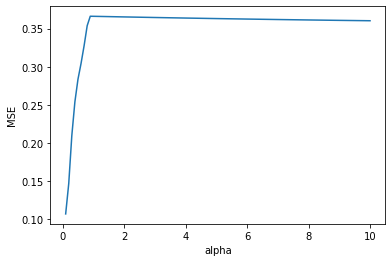

In [16]:
# 畫出alpha與MSE的關係圖-alpha越大，正則化強度就越大，故誤差值也就越大，alpha=1時最大，之後慢慢減小
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.plot(alpha,MSE)